# Phase 2 of Basic Visualizations
Let's create beyond the raw datasets, it would be very help if we can process the feature engineering as the preliminary before put the analysis or dashboard on it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_url = '/Users/dicky.girsang/Desktop/explore-with-ssmi-main/notebooks/data.csv'
df = pd.read_csv(data_url)
df = pd.DataFrame(df)
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.head(8)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,2019-03-25 18:30:00
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2019-02-25 14:36:00
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,2019-02-24 11:38:00


## Table-based

In [7]:
df['day_of_week'] = df['datetime'].dt.day_name()

# Calculate gross profit margin
df['gross_profit_margin'] = (df['gross income'] / df['Total']) * 100
print(df[['datetime', 'day_of_week', 'gross_profit_margin']].head())

             datetime day_of_week  gross_profit_margin
0 2019-01-05 13:08:00    Saturday             4.761905
1 2019-03-08 10:29:00      Friday             4.761905
2 2019-03-03 13:23:00      Sunday             4.761905
3 2019-01-27 20:33:00      Sunday             4.761905
4 2019-02-08 10:37:00      Friday             4.761905


In [ ]:
business_metrics = df.groupby(['day_of_week', 'Customer type']).agg(
    total_sales=('Total', 'sum'),
    average_rating=('Rating', 'mean'),
    average_gross_profit_margin=('gross_profit_margin', 'mean')
).round(2).reset_index()

business_metrics = business_metrics[['day_of_week', 'Customer type', 'total_sales', 'average_rating', 'average_gross_profit_margin']]
business_metrics

,day_of_week,Customer type,total_sales,average_rating,average_gross_profit_margin
0,Friday,Member,22183.84,7.08,4.76
1,Friday,Normal,21742.50,7.07,4.76
2,Monday,Member,18355.07,7.55,4.76
3,Monday,Normal,19544.01,6.80,4.76
4,Saturday,Member,28122.96,6.82,4.76
5,Saturday,Normal,27997.85,6.99,4.76
6,Sunday,Member,25533.55,7.04,4.76
7,Sunday,Normal,18924.34,6.98,4.76
8,Thursday,Member,18393.64,6.75,4.76
9,Thursday,Normal,26955.61,7.01,4.76


In [11]:
clv_metrics = df.groupby(['Customer type', 'Gender']).agg(
    total_spend=('Total', 'sum'),
    total_gross_income=('gross income', 'sum'),
    average_rating=('Rating', 'mean'),
    average_rating_stdev=('Rating', 'std'),
    number_of_transactions=('Invoice ID', 'count')
).reset_index()

# a simple customer value score: (total_spend * average_rating)
clv_metrics['customer_value_score'] = (clv_metrics['total_spend'] * clv_metrics['average_rating']).round(2)

# total spend percentile rank
clv_metrics['total_spend_percentile_rank'] = clv_metrics['total_spend'].rank(pct=True).round(2)
clv_metrics

,Customer type,Gender,total_spend,total_gross_income,average_rating,average_rating_stdev,number_of_transactions,customer_value_score,total_spend_percentile_rank
0,Member,Female,88146.9435,4197.4735,6.940613,1.777995,261,611793.82,1.00
1,Member,Male,76076.5005,3622.6905,6.940000,1.721433,240,527970.91,0.25
2,Normal,Female,79735.9815,3796.9515,6.990417,1.734595,240,557387.73,0.75
3,Normal,Male,79007.3235,3762.2535,7.018919,1.647334,259,554546.00,0.50


In [12]:
df['hour_of_day'] = df['datetime'].dt.hour

# Categorize the hour into time periods
bins = [0, 12, 17, 24]
labels = ['Morning', 'Afternoon', 'Evening']
df['time_of_day'] = pd.cut(df['hour_of_day'], bins=bins, labels=labels, right=False)

time_based_metrics = df.groupby('time_of_day').agg(
    total_sales=('Total', 'sum'),
    average_quantity=('Quantity', 'mean'),
    transaction_count=('Invoice ID', 'count')
).round(2).reset_index()
time_based_metrics

,time_of_day,total_sales,average_quantity,transaction_count
0,Morning,61798.81,5.43,191
1,Afternoon,148023.34,5.57,454
2,Evening,113144.60,5.47,355


Customer ratings are consistently high across all customer segments and days of the week. This indicates that the overall service quality is stable and reliable. Additionally, the gross profit margin is fixed at 4.76% for every transaction, showing a consistent pricing strategy regardless of the customer type or day

On the other part, business's peak performance occurs during Fridays, Saturdays, and Tuesdays, and specifically in the Afternoon. The afternoon period sees the highest total sales and transaction counts. This suggests your business is most successful during weekend shopping and early evening hours. Then, we should plan for increased staffing and targeted promotions during these times



## Visual

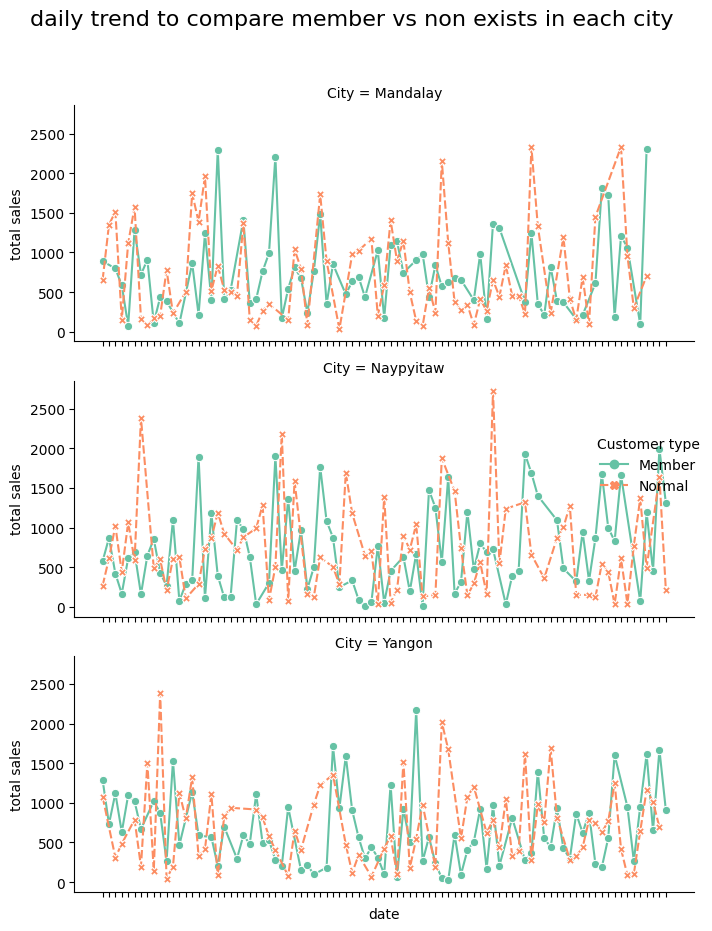

In [13]:
df_daily_city_sales = df.groupby(['Date', 'City', 'Customer type'])['Total'].sum().reset_index()

# multi-panel line plot with rows=City for a vertical layout
g = sns.relplot(
    data=df_daily_city_sales,
    x='Date',
    y='Total',
    hue='Customer type',
    row='City',  # vertical layout
    kind='line',
    style='Customer type',
    markers=True,
    height=3,
    aspect=2,  
    palette='Set2'
)

g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels('date', 'total sales')
g.fig.suptitle('daily trend to compare member vs non exists in each city', y=1.03, fontsize=16)

plt.tight_layout()
plt.show()

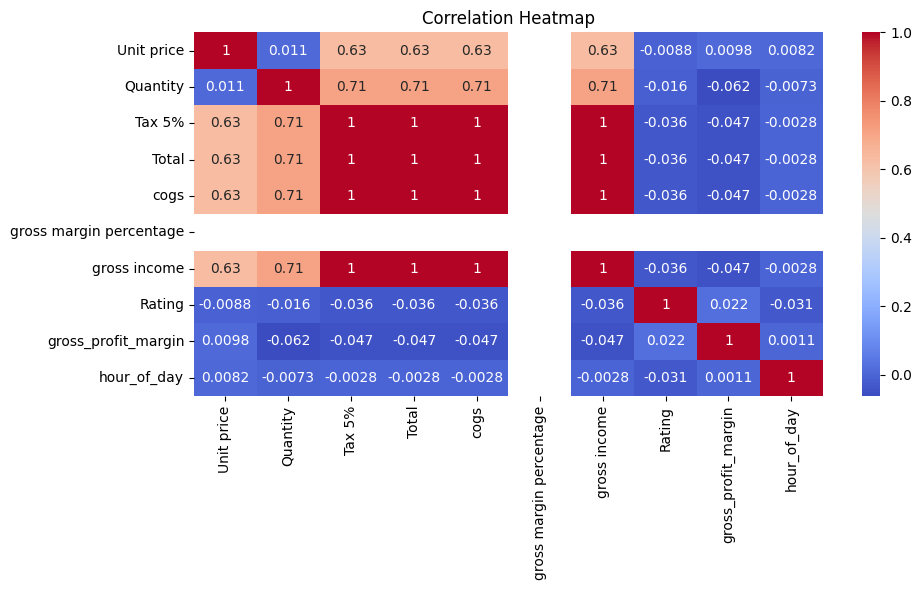

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
